## Öğrenme Nedir?

Öğrenmemnin ne olduğunu iki örnekle görelim:

**Örnek 1:**

Elimizde hayali bir şirketin Reklam verileri var. (Advertising.csv)

200 farklı pazarda yapılan TV, Radio ve Newspaper reklam harcamaları sonucu gerçekleşen Satışı (Sales) görüyoruz.

Amacımız, reklam harcamaları ile Satış miktarı arasında, varsa, bir ilişki bulmak.

Böylece gelecekte ne kadar reklam bütçesi ile tahmini olarak ne kadar satış yapabileceğimizi göreceğiz.

**Girdi Değişenleri:** Harcama Tutarları - USD (TV, Radio, Newspaper) -> Input, Features

**Çıktı Değişkeni:** Satış miktarı - Adet (Sales) -> Output, Label

$X_1: TV$

$X_2: Radio$

$X_3: Newspaper$

$y: Sales$

In [24]:
# kütüphaneleri import edelim

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
# datayı oku

df = pd.read_csv('data/Advertising.csv', index_col=0)


In [26]:
# describe

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [27]:
# head

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [28]:
# Input 

X_1 = df['TV']
X_2 = df['radio']
X_3 = df['newspaper']

In [29]:
# ilk değişken

X_1

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [30]:
# ilk değişken tipi

type(X_1)

pandas.core.series.Series

In [31]:
# ilk değişken şekli

X_1.shape

(200,)

In [36]:
# Output

y = df['sales']

In [37]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [34]:
y.shape

(200,)

In [35]:
type(y)

pandas.core.series.Series

In [33]:
# regresyon için hazırlık yap

linear_regressor = LinearRegression()

In [38]:
# dataframe'lerin şeklini düzenle -> output

y_r = y.values.reshape(-1, 1)

In [39]:
# orjinal çıktının şekli
# satır, sütun

y.shape

(200,)

In [40]:
# yeniden boyutlanmış çıktının şekli
y_r.shape

(200, 1)

In [41]:
# dataframe'lerin şeklini düzenle -> input

X_1_r = X_1.values.reshape(-1, 1)
X_2_r = X_2.values.reshape(-1, 1)
X_3_r = X_3.values.reshape(-1, 1)

In [42]:
X_1_r.shape

(200, 1)

Text(0.5, 1.0, 'SATIŞ - TV')

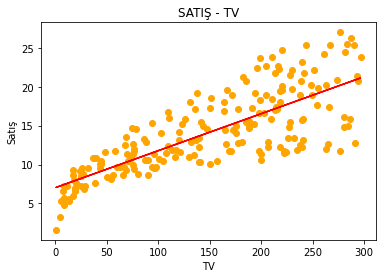

In [45]:
# SATIŞ - TV

# data -> X_1
plt.scatter(X_1, y, c='orange')

# regresyon
linear_regressor.fit(X_1_r, y_r)
y_pred_1 = linear_regressor.predict(X_1_r)
plt.plot(X_1, y_pred_1, color='red')

plt.xlabel('TV')
plt.ylabel('Satış')
plt.title('SATIŞ - TV')

Text(0.5, 1.0, 'SATIŞ - RADIO')

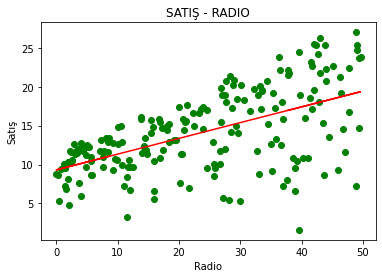

In [48]:
# SATIŞ - RADIO

# data -> X_2
plt.scatter(X_2, y, c='green')

# regresyon
linear_regressor.fit(X_2_r, y_r)
y_pred_2 = linear_regressor.predict(X_2_r)
plt.plot(X_2, y_pred_2, color='red')

plt.xlabel('Radio')
plt.ylabel('Satış')
plt.title('SATIŞ - RADIO')


Text(0.5, 1.0, 'SATIŞ - NEWSPAPER')

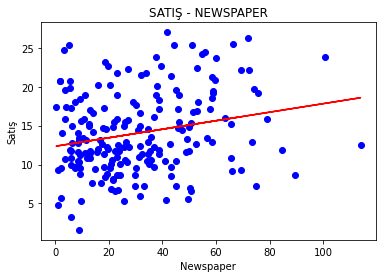

In [49]:
# SATIŞ - NEWSPAPER

# data -> X_3
plt.scatter(X_3, y, c='blue')

# regresyon
linear_regressor.fit(X_3_r, y_r)
y_pred_3 = linear_regressor.predict(X_3_r)
plt.plot(X_3, y_pred_3, color='red')

plt.xlabel('Newspaper')
plt.ylabel('Satış')
plt.title('SATIŞ - NEWSPAPER')


---

Genel olarak şöyle düşünelim:

Y ile X arasında şu şekilde bir ilişki olduğunu kabul edelim:

$$Y = f(X) + \epsilon$$

Burada:

**$f()$** : Ne olduğu bilinmeyen bir fonksiyon.

**$\epsilon$** : Rasgele hata miktarı (error term) -> ölçüm hatası, insan hatası vs.

---

**Örnek 2:**

Gelir ile Eğitim Düzeyi arasındaki ilişkiye bakalım şimdi.

Elimizde 30 çalışana ait Gelir (Income) ve Eğitim Yılı (Education) bilgisi var.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [51]:
income = pd.read_csv('data/Income.csv', index_col=0)

In [52]:
income.head(5)

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


In [53]:
# input

X = income['Education']

In [54]:
# output

y = income['Income']

In [55]:
# regreson için hazırlık
# reshape dataframes

X_r = X.values.reshape(-1, 1)
y_r = y.values.reshape(-1, 1)

Text(0.5, 1.0, 'INCOME - EDUCATION')

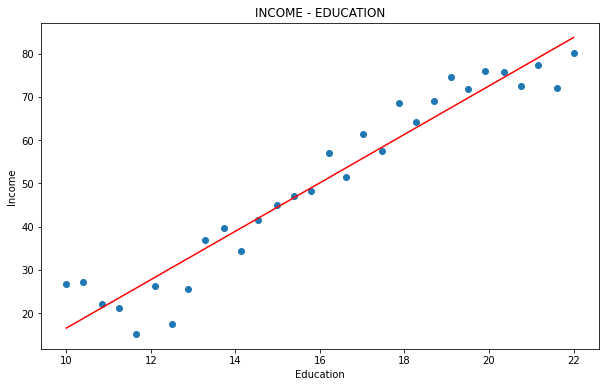

In [58]:
# grafik - Lineer Regression

# data
plt.figure(figsize=(10, 6))
plt.scatter(X, y)

# regresyon
lr = LinearRegression()
lr.fit(X_r, y_r)
y_pred = lr.predict(X_r)
plt.plot(X, y_pred, color='red')

plt.xlabel('Education')
plt.ylabel('Income')
plt.title('INCOME - EDUCATION')


Gördüğünüz gibi doğrusal bir çizgi (Lineer Regression) çizdiğimiz için çok oturmadı veriye.

Eğer daha yüksek dereceli (4. derece) bir Polinom olarak modelleseydik:

<img src='images/quadratik.jpg' />

Bu sefer başka bir fonksiyon görüyoruz. Biraz daha güzel oturdu veriye.

Ama hala tam olarak **f** bilmiyoruz.

Aslında,

Makine Öğrenmesi **f** ye yaklaşmak için (hiçbir zaman bilemeyiz çünkü) geliştirilmiş algoritmalardır.

Eğer **f**'yi bilmiyorsak, o zaman tahmin etmeye çalışacağız.

**İşte bu, tahmin yapıp, bilmediğimiz f'ye yaklaşma çabasına `Öğrenme` diyoruz.**